<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/Neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= '0.20'
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

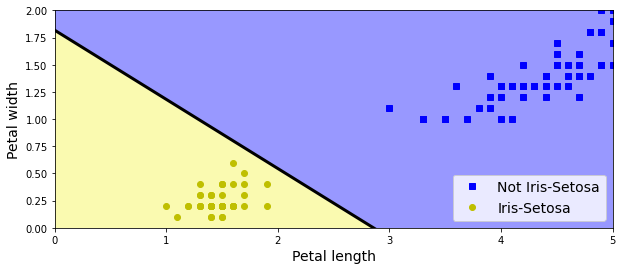

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1,0], X[y==1,1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

## Activation functions

In [8]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def relu(z):
  return np.maximum(0,z)

def tanh(z):
  return(np.tanh(z))

def step(z):
  return(np.sign(z))


def derivative(f, z, eps=0.000001):
  return (f(z+eps)-f(z-eps))/(2*eps)

(-5.0, 5.0, -0.2, 1.2)

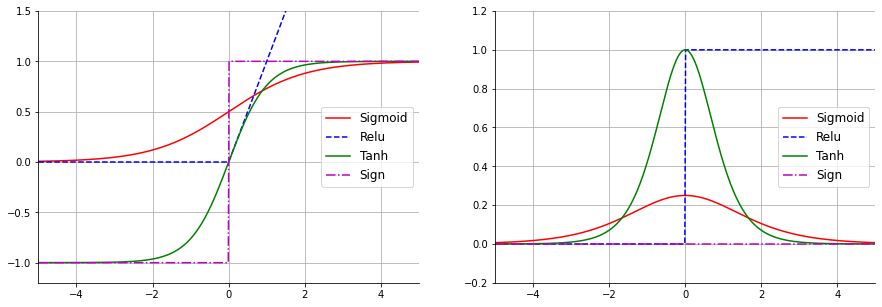

In [9]:
x = np.linspace(-5, 5, 500)
sig = sigmoid(x)
rel = relu(x)
tan = tanh(x)
sig2 = sign(x)

sig_der = derivative(sigmoid, x, eps=0.000001)
rel_der = derivative(relu, x, eps=1e-6)
tan_der = derivative(tanh, x, eps=1e-6)
sig2_der = derivative(step, x, eps=1e-6)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.grid('True')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(x, sig, 'r-', label="Sigmoid")
plt.plot(x, rel, 'b--', label="Relu")
plt.plot(x, tan,'g-', label="Tanh")
plt.plot(x, sig2,"m-." ,label="Sign")
plt.legend(loc="center right", fontsize=12)
plt.axis([-5,5,-1.2,1.5])


plt.subplot(122)
plt.grid('True')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(x, sig_der, 'r-', label="Sigmoid")
plt.plot(x, rel_der, 'b--', label="Relu")
plt.plot(x, tan_der,'g-', label="Tanh")
plt.plot(x, sig2_der,"m-." ,label="Sign")
plt.legend(loc="center right", fontsize=12)
plt.axis([-5,5,-0.2,1.2])


## MLP - Classification

In [12]:
import tensorflow as tf
from tensorflow import keras

In [15]:
print('TF version:',tf.__version__)
print('Keras version:', keras.__version__)

TF version: 2.3.0
Keras version: 2.4.0


In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [19]:
X_train_full.shape

(60000, 28, 28)

In [20]:
X_train_full.dtype

dtype('uint8')

In [21]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

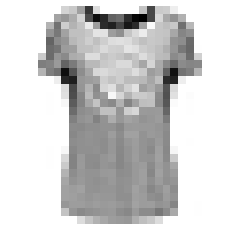

In [24]:
plt.imshow(X_train[1], cmap='binary')
plt.axis('off')
plt.show()

In [29]:
pd.DataFrame(y_train).value_counts()

0    5543
4    5512
8    5510
6    5507
5    5507
3    5499
2    5496
9    5494
7    5488
1    5444
dtype: int64

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [40]:
class_names[2]

'Pullover'

In [31]:
y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [44]:
class_names[y_train[20]]

'Sneaker'

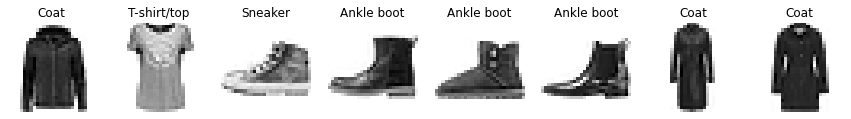

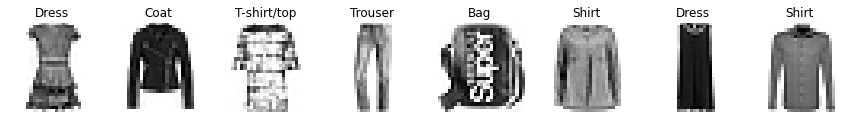

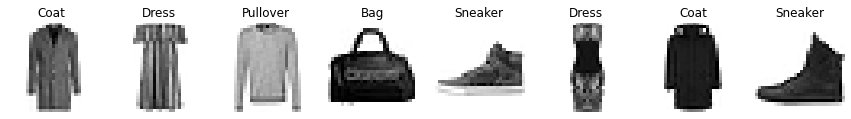

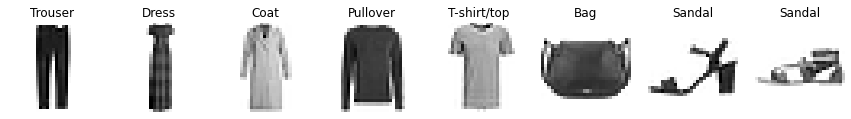

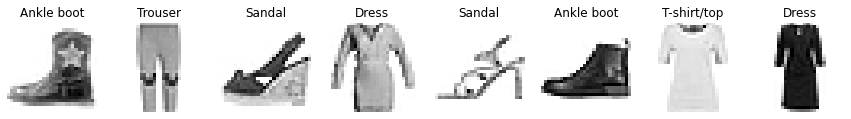

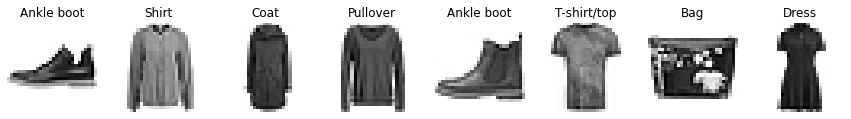

In [39]:
n_rows = 6
n_cols = 8

for row in range(n_rows):
  plt.figure(figsize=(15,12))
  for col in range(n_cols):

    n_img = row*n_cols + col + 1

    plt.subplot(n_rows, n_cols, n_img)
    plt.imshow(X_train[n_img-1], cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_train[n_img -1]], fontsize=12)

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [49]:
# or

model = keras.models.Sequential([
   keras.layers.Flatten(input_shape=[28,28]),                              
   keras.layers.Dense(300, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')

])

In [50]:
model.layers

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [52]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

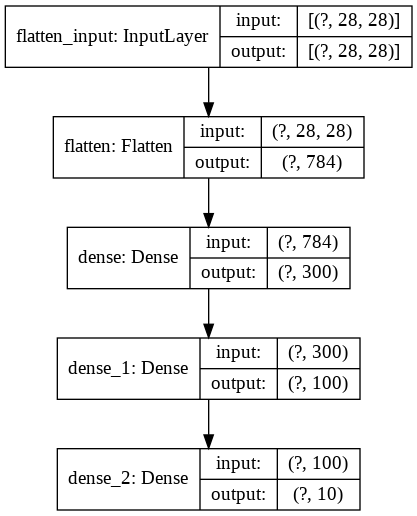

In [56]:
keras.utils.plot_model(model, show_shapes=True)

In [59]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [66]:
model.layers

In [73]:
layer0 = model.layers[0]

In [75]:
layer0.name

'flatten'

In [74]:
weights, biases = hidden1.get_weights()

In [71]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [76]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

In [77]:
# or
model.compile(loss= keras.losses.sparse_categorical_crossentropy,
       optimizer = keras.optimizers.SGD(),
       metrics = [keras.metrics.sparse_categorical_accuracy]       
              )

In [81]:
fit_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0979 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.3239 - val_sparse_categorical_accuracy: 0.8988
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0976 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.3527 - val_sparse_categorical_accuracy: 0.8910
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8886
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.3257 - val_sparse_categorical_accuracy: 0.9000
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.3290 - val_sparse_categorical_accuracy: 0.9052
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0910 - spars

In [82]:
fit_history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [83]:
fit_history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

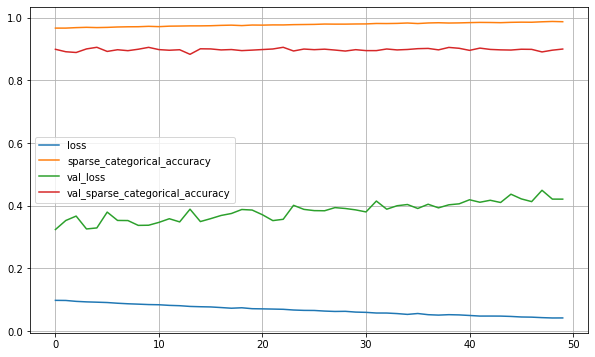

In [84]:
pd.DataFrame(fit_history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [86]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4685 - sparse_categorical_accuracy: 0.8925


[0.46853119134902954, 0.8924999833106995]

In [87]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
y_pred.shape

(10000,)

In [94]:
y_pred5 = y_pred[:5]

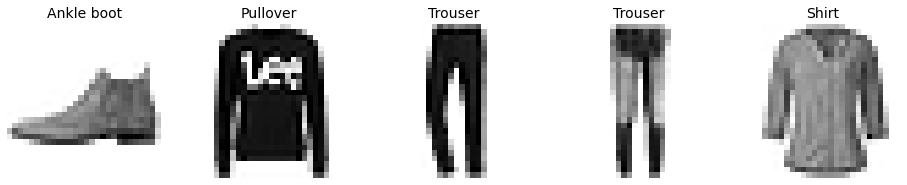

In [95]:
plt.figure(figsize=(16,6))

for index, img in enumerate(X_test[:5]):

  plt.subplot(1,5,index+1)
  plt.imshow(img, cmap = 'binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=14)
plt.show()

In [98]:
np.array(class_names)[y_pred5]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

## MLP - Regression

In [99]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)

(11610, 8)


In [102]:
X_train.shape[1:]

(8,)

In [100]:
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),  
  keras.layers.Dense(1)                               
])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(lr=1e-3), metrics=[keras.metrics.mean_squared_error])

In [137]:
fit_history = model.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 0s 1ms/step - loss: 1.8737 - mean_squared_error: 1.8737 - val_loss: 0.7688 - val_mean_squared_error: 0.7688
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.6360 - mean_squared_error: 0.6360 - val_loss: 0.6091 - val_mean_squared_error: 0.6091
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.5705 - val_mean_squared_error: 0.5705
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5354 - mean_squared_error: 0.5354 - val_loss: 0.5174 - val_mean_squared_error: 0.5174
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5143 - mean_squared_error: 0.5143 - val_loss: 0.4895 - val_mean_squared_error: 0.4895
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4965 - mean_squared_error: 0.4965 - val_loss: 0.4710 - val_mean_squared_error: 0.4710
Epoch 7/50
363/363 [========

In [138]:
fit_history.params

{'epochs': 50, 'steps': 363, 'verbose': 1}

In [139]:
fit_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [140]:
his = pd.DataFrame(fit_history.history)
print(his.head(5))
his2 = his.iloc[:,[0,2]]
print(his2.head(5))

       loss  mean_squared_error  val_loss  val_mean_squared_error
0  1.873679            1.873679  0.768813                0.768813
1  0.635976            0.635976  0.609103                0.609103
2  0.564924            0.564924  0.570548                0.570548
3  0.535392            0.535392  0.517447                0.517447
4  0.514317            0.514317  0.489458                0.489458
       loss  val_loss
0  1.873679  0.768813
1  0.635976  0.609103
2  0.564924  0.570548
3  0.535392  0.517447
4  0.514317  0.489458


In [141]:
his2.columns
his2.columns = ['Train_loss', 'Validation_loss']
his2.columns

Index(['Train_loss', 'Validation_loss'], dtype='object')

No handles with labels found to put in legend.


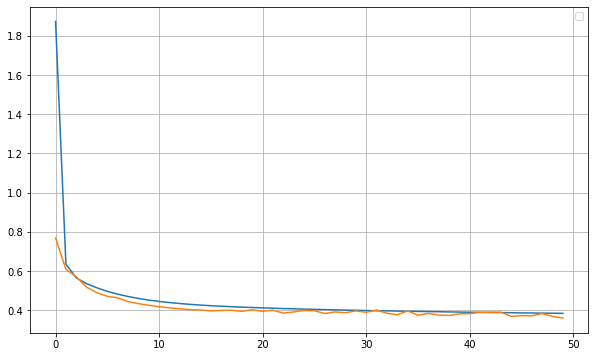

In [142]:
plt.figure(figsize=(10,6))
plt.plot(his2)
plt.grid('True')
plt.legend(loc='upper right')
plt.show()